In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
game_stats_2021 = pd.read_csv('game_stats_2021.csv',index_col=[0])
game_stats_2022 = pd.read_csv('game_stats_2022.csv',index_col=[0])
game_scoring_2021 = pd.read_csv('game_scoring_2021.csv',index_col=[0])
game_scoring_2022 = pd.read_csv('game_scoring_2022.csv',index_col=[0])

In [3]:
game_stats_2021

,id,school,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401281942,Alabama,28-39,0,28,0-1,1,1,0.0,12.0,...,4.0,25,7.0,10-16,2.0,8-81,501,1,9.1,3.9
1,401281942,Miami,23-31,0,18,1-2,1,1,NaN,NaN,...,1.0,35,10.0,6-14,1.0,7-75,266,3,5.8,2.8
2,401281943,Arkansas,12-21,0,18,0-1,0,0,0.0,88.0,...,2.0,24,6.5,3-11,2.0,13-117,373,1,6.1,5.6
3,401281943,Rice,17-34,0,19,1-2,0,0,0.0,0.0,...,2.0,30,3.0,4-15,1.0,10-60,308,3,6.7,2.1
4,401281944,Akron,22-27,0,12,2-5,0,0,NaN,NaN,...,0.0,38,2.0,3-14,4.0,5-35,188,0,7.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,401319455,South Carolina State,30-47,0,24,2-2,0,0,NaN,NaN,...,1.0,32,3.0,6-13,NaN,5-45,428,3,7.5,2.8
1540,401327913,Fordham,18-30,0,12,1-4,0,2,NaN,NaN,...,1.0,52,3.0,2-13,0.0,2-15,292,3,5.4,4.6
1541,401327913,Nebraska,21-30,0,34,4-4,2,0,0.0,11.0,...,1.0,26,5.0,12-19,4.0,2-10,633,2,10.1,5.1
1542,401328545,Coastal Carolina,20-24,0,28,1-1,0,0,NaN,NaN,...,0.0,29,0.0,4-6,1.0,4-40,610,0,14.5,8.2


In [4]:
current_scoring = game_scoring_2022.copy()
current_stats = game_stats_2022.copy()
current_stats.rename(columns={'id':'game_id'},inplace=True)

In [5]:
current_scoring.head()

,game_id,week,team_id,school,points,date,venue_id,venue,neutral_site,opponent,...,opponent_id,points_q1,points_q2,points_q3,points_q4,points_allowed_q1,points_allowed_q2,points_allowed_q3,points_allowed_q4,is_home
0,401426532.0,1.0,98.0,Western Kentucky,38.0,2022-08-27T16:00:00.000Z,3796.0,Houchens Industries-L. T. Smith Stadium,False,Austin Peay,...,2046.0,7.0,14.0,0.0,17.0,10.0,7.0,3.0,7.0,1
1,401405059.0,1.0,77.0,Northwestern,31.0,2022-08-27T16:30:00.000Z,3504.0,Aviva Stadium,True,Nebraska,...,158.0,3.0,14.0,7.0,7.0,7.0,7.0,14.0,0.0,1
2,401439512.0,1.0,125762.0,Florida Memorial University,39.0,2022-08-27T19:00:00.000Z,NaN,NaN,True,Edward Waters,...,2206.0,13.0,13.0,6.0,7.0,0.0,0.0,21.0,13.0,1
3,401413256.0,1.0,2439.0,UNLV,52.0,2022-08-27T19:30:00.000Z,6501.0,Allegiant Stadium,False,Idaho State,...,304.0,10.0,35.0,0.0,7.0,7.0,0.0,7.0,7.0,1
4,401413213.0,1.0,55.0,Jacksonville State,42.0,2022-08-27T19:30:00.000Z,3689.0,Cramton Bowl,True,Stephen F. Austin,...,2617.0,7.0,14.0,21.0,0.0,7.0,10.0,0.0,0.0,1


In [6]:
current_stats.head()

,game_id,school,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401403853,Hawai'i,28-55,0.0,20,0-4,2,0,NaN,NaN,...,0.0,44.0,0.0,5-16,4.0,8-72,358,2,4.5,4.2
1,401403853,Vanderbilt,16-28,0.0,28,1-5,0,4,NaN,NaN,...,3.0,54.0,0.0,5-11,1.0,5-60,601,0,7.0,9.2
2,401403854,Alabama,27-40,0.0,30,0-0,0,0,NaN,NaN,...,0.0,26.0,5.0,6-10,NaN,6-40,559,1,7.0,8.7
3,401403854,Utah State,8-22,0.0,7,2-4,0,0,0.0,18.0,...,1.0,40.0,5.0,3-17,3.0,11-110,136,0,2.6,2.1
4,401403855,Arkansas,18-26,0.0,23,0-0,1,2,0.0,51.0,...,3.0,36.0,8.0,8-16,3.0,7-63,447,1,8.6,5.0


In [7]:
current_game_stats = current_scoring.merge(current_stats,how='left',on=['game_id','school'])

In [8]:
stats_df = current_game_stats[current_game_stats['game_id'].notnull()].copy()
stats_df = stats_df[stats_df['neutral_site']==False].copy()

In [9]:
stats_df.fillna(0,inplace=True)

In [10]:
stats_df[stats_df['school']=='Michigan'].head()

,game_id,week,team_id,school,points,date,venue_id,venue,neutral_site,opponent,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
134,401405067.0,1.0,130.0,Michigan,51.0,2022-09-03T16:00:00.000Z,3558.0,Michigan Stadium,False,Colorado State,...,7.0,40.0,11.0,3-10,0.0,1-10,440.0,0.0,7.4,5.9
629,401405077.0,2.0,130.0,Michigan,56.0,2022-09-11T00:00:00.000Z,3558.0,Michigan Stadium,False,Hawai'i,...,1.0,33.0,2.0,2-6,1.0,3-35,588.0,1.0,14.5,8.1
659,401404149.0,3.0,130.0,Michigan,59.0,2022-09-17T16:00:00.000Z,3558.0,Michigan Stadium,False,Connecticut,...,0.0,26.0,5.0,9-13,0.0,4-24,465.0,0.0,10.5,4.5
999,401405097.0,4.0,130.0,Michigan,34.0,2022-09-24T16:00:00.000Z,3558.0,Michigan Stadium,False,Maryland,...,3.0,38.0,5.0,5-12,3.0,1-15,463.0,1.0,8.5,6.1
1904,401405115.0,7.0,130.0,Michigan,41.0,2022-10-15T16:00:00.000Z,3558.0,Michigan Stadium,False,Penn State,...,2.0,20.0,4.0,11-17,2.0,9-61,563.0,1.0,6.0,7.6


In [11]:
stats_df['date'] = pd.to_datetime(stats_df['date']).dt.tz_localize(None).dt.date

stats_df['totalPenalties'] = stats_df['totalPenaltiesYards'].str.split('-').str[0]
stats_df['totalPenaltyYards'] = stats_df['totalPenaltiesYards'].str.split('-').str[1]

stats_df['completions'] = stats_df['completionAttempts'].str.split('-').str[0]
stats_df['completionAttempts'] = stats_df['completionAttempts'].str.split('-').str[1]
stats_df.dropna(inplace=True)

stats_df['completions'] = stats_df['completions'].astype(int)
stats_df['completionAttempts'] = stats_df['completionAttempts'].astype(int)

stats_df['completion_percentage'] = stats_df['completions'] / stats_df['completionAttempts']

In [12]:
#Dropping 4th down column because I havent figured out how to split a string on -- and -
stats_df.drop(columns=['fourthDownEff','neutral_site','thirdDownEff'],inplace=True)

In [13]:
stats_df.dtypes

game_id                  float64
week                     float64
team_id                  float64
school                    object
points                   float64
date                      object
venue_id                 float64
venue                     object
opponent                  object
points_allowed           float64
opponent_id              float64
points_q1                float64
points_q2                float64
points_q3                float64
points_q4                float64
points_allowed_q1        float64
points_allowed_q2        float64
points_allowed_q3        float64
points_allowed_q4        float64
is_home                    int64
completionAttempts         int64
defensiveTDs             float64
firstDowns               float64
fumblesLost              float64
fumblesRecovered         float64
interceptionTDs          float64
interceptionYards        float64
interceptions            float64
kickReturnTDs            float64
kickReturnYards          float64
kickReturn

In [14]:
stats_df['possessionMins'] = stats_df['possessionTime'].str.split(':').str[0]
stats_df['possessionSecs'] = stats_df['possessionTime'].str.split(':').str[1]

In [15]:
stats_df['timeOfPossession'] = ((stats_df['possessionMins'].astype(int) * 60) + stats_df['possessionSecs'].astype(int))

stats_df.drop(columns=['possessionMins', 'possessionSecs','possessionTime'],inplace=True)

In [16]:
stats_df.head()

,game_id,week,team_id,school,points,date,venue_id,venue,opponent,points_allowed,...,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt,totalPenalties,totalPenaltyYards,completions,completion_percentage,timeOfPossession
0,401426532.0,1.0,98.0,Western Kentucky,38.0,2022-08-27,3796.0,Houchens Industries-L. T. Smith Stadium,Austin Peay,27.0,...,8-86,387.0,1.0,8.2,3.4,8,86,20,0.588235,1651
3,401413256.0,1.0,2439.0,UNLV,52.0,2022-08-27,6501.0,Allegiant Stadium,Idaho State,21.0,...,7-65,554.0,0.0,11.6,4.5,7,65,26,0.742857,1824
5,401404146.0,1.0,328.0,Utah State,31.0,2022-08-27,3905.0,Romney Stadium,Connecticut,20.0,...,6-60,542.0,2.0,9.1,4.8,6,60,20,0.645161,1903
6,401405058.0,1.0,356.0,Illinois,38.0,2022-08-27,3832.0,Memorial Stadium,Wyoming,6.0,...,6-65,477.0,0.0,5.4,6.3,6,65,30,0.750000,2196
7,401411090.0,1.0,52.0,Florida State,47.0,2022-08-27,3697.0,Bobby Bowden Field at Doak Campbell Stadium,Duquesne,7.0,...,5-55,638.0,1.0,10.5,7.5,5,55,14,0.636364,2113


In [17]:
stats_df['totalPenalties'] = stats_df['totalPenalties'].astype(int)
stats_df['totalPenaltyYards'] = stats_df['totalPenaltyYards'].astype(int)

In [18]:
stats_df.columns

Index(['game_id', 'week', 'team_id', 'school', 'points', 'date', 'venue_id',
       'venue', 'opponent', 'points_allowed', 'opponent_id', 'points_q1',
       'points_q2', 'points_q3', 'points_q4', 'points_allowed_q1',
       'points_allowed_q2', 'points_allowed_q3', 'points_allowed_q4',
       'is_home', 'completionAttempts', 'defensiveTDs', 'firstDowns',
       'fumblesLost', 'fumblesRecovered', 'interceptionTDs',
       'interceptionYards', 'interceptions', 'kickReturnTDs',
       'kickReturnYards', 'kickReturns', 'kickingPoints', 'netPassingYards',
       'passesDeflected', 'passesIntercepted', 'passingTDs', 'puntReturnTDs',
       'puntReturnYards', 'puntReturns', 'qbHurries', 'rushingAttempts',
       'rushingTDs', 'rushingYards', 'sacks', 'tackles', 'tacklesForLoss',
       'totalFumbles', 'totalPenaltiesYards', 'totalYards', 'turnovers',
       'yardsPerPass', 'yardsPerRushAttempt', 'totalPenalties',
       'totalPenaltyYards', 'completions', 'completion_percentage',
       'tim

In [19]:
corr = stats_df.corr()
most_corr = corr.index[abs(corr['points'])>0.4]

In [20]:
most_corr

Index(['points', 'points_q2', 'points_q3', 'firstDowns', 'kickingPoints',
       'netPassingYards', 'passingTDs', 'rushingTDs', 'rushingYards',
       'totalYards', 'yardsPerPass', 'yardsPerRushAttempt',
       'completion_percentage'],
      dtype='object')

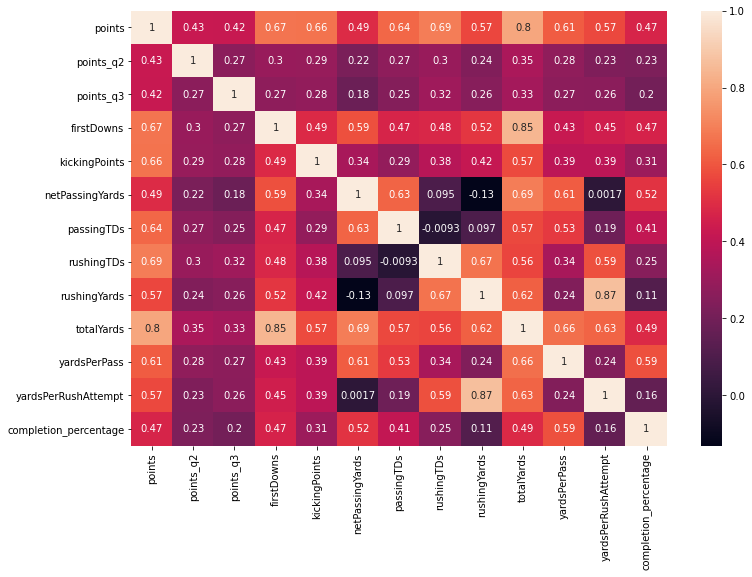

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(stats_df[most_corr].corr(),annot=True)

In [22]:
stats_df_important = stats_df[['week','team_id','points', 'points_q2', 'points_q3', 'firstDowns', 'kickingPoints',
       'netPassingYards', 'passingTDs', 'rushingTDs', 'rushingYards',
       'totalYards', 'yardsPerPass', 'yardsPerRushAttempt',
       'completion_percentage']].copy()

In [23]:
#Get averages per game for each of the most correlated statistics

In [24]:
stats_df_important

,week,team_id,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
0,1.0,98.0,38.0,14.0,0.0,19.0,8.0,279.0,4.0,0.0,108.0,387.0,8.2,3.4,0.588235
3,1.0,2439.0,52.0,35.0,0.0,23.0,10.0,405.0,5.0,2.0,149.0,554.0,11.6,4.5,0.742857
5,1.0,328.0,31.0,24.0,0.0,31.0,7.0,281.0,3.0,1.0,261.0,542.0,9.1,4.8,0.645161
6,1.0,356.0,38.0,10.0,7.0,26.0,8.0,217.0,2.0,3.0,260.0,477.0,5.4,6.3,0.750000
7,1.0,52.0,47.0,6.0,14.0,33.0,11.0,232.0,0.0,6.0,406.0,638.0,10.5,7.5,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,12.0,5.0,10.0,0.0,0.0,12.0,4.0,211.0,0.0,1.0,48.0,259.0,6.0,2.2,0.485714
7076,12.0,23.0,31.0,0.0,0.0,17.0,5.0,257.0,4.0,0.0,84.0,341.0,8.6,3.0,0.666667
7077,12.0,254.0,17.0,0.0,0.0,22.0,5.0,170.0,0.0,1.0,156.0,326.0,4.5,4.3,0.552632
7078,12.0,278.0,41.0,0.0,0.0,26.0,11.0,361.0,2.0,3.0,163.0,524.0,8.6,4.9,0.690476


In [25]:
grouped_stats_df = stats_df_important.groupby(by=['team_id','week'])[['points', 'points_q2', 'points_q3', 'firstDowns', 'kickingPoints',
       'netPassingYards', 'passingTDs', 'rushingTDs', 'rushingYards',
       'totalYards', 'yardsPerPass', 'yardsPerRushAttempt',
       'completion_percentage']].mean().reset_index()

In [26]:
grouped_stats_df.head()

,team_id,week,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
0,2.0,1.0,42.0,14.0,14.0,22.0,6.0,212.0,1.0,5.0,285.0,497.0,10.1,7.0,0.619048
1,2.0,2.0,24.0,7.0,10.0,18.0,6.0,168.0,0.0,3.0,210.0,378.0,7.3,5.5,0.608696
2,2.0,3.0,12.0,3.0,0.0,23.0,6.0,296.0,1.0,0.0,119.0,415.0,7.8,3.3,0.552632
3,2.0,4.0,17.0,0.0,0.0,15.0,5.0,135.0,0.0,2.0,82.0,217.0,6.4,1.8,0.666667
4,2.0,5.0,17.0,10.0,0.0,20.0,5.0,337.0,2.0,0.0,101.0,438.0,8.6,3.3,0.487179


In [27]:
grouped_stats_df[grouped_stats_df['team_id']==333.0]

,team_id,week,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
1316,333.0,1.0,55.0,24.0,14.0,30.0,13.0,281.0,6.0,1.0,278.0,559.0,7.0,8.7,0.675000
1317,333.0,2.0,20.0,0.0,0.0,16.0,8.0,213.0,1.0,1.0,161.0,374.0,5.5,6.7,0.692308
1318,333.0,3.0,63.0,7.0,14.0,23.0,9.0,236.0,3.0,3.0,273.0,509.0,11.8,7.0,0.650000
1319,333.0,4.0,55.0,17.0,10.0,34.0,13.0,400.0,4.0,3.0,228.0,628.0,9.3,6.7,0.697674
1320,333.0,5.0,49.0,14.0,0.0,17.0,7.0,238.0,2.0,5.0,317.0,555.0,10.8,7.5,0.500000
1321,333.0,6.0,24.0,17.0,7.0,24.0,6.0,111.0,3.0,0.0,288.0,399.0,5.8,5.6,0.631579
1322,333.0,7.0,49.0,13.0,15.0,32.0,11.0,455.0,2.0,3.0,114.0,569.0,8.8,3.7,0.673077
1323,333.0,8.0,30.0,7.0,0.0,21.0,12.0,261.0,2.0,1.0,29.0,290.0,7.1,1.1,0.594595
1324,333.0,10.0,31.0,0.0,13.0,25.0,13.0,328.0,1.0,2.0,137.0,465.0,6.4,4.6,0.490196
1325,333.0,11.0,30.0,14.0,13.0,18.0,12.0,209.0,3.0,0.0,108.0,317.0,6.3,3.0,0.636364


In [30]:
grouped_stats_df['avg_points'] = grouped_stats_df.groupby(by=['team_id'])['points'].expanding().mean()

TypeError: incompatible index of inserted column with frame index

In [29]:
grouped_stats_df

,team_id,week,points,points_q2,points_q3,firstDowns,kickingPoints,netPassingYards,passingTDs,rushingTDs,rushingYards,totalYards,yardsPerPass,yardsPerRushAttempt,completion_percentage
0,2.0,1.0,42.0,14.0,14.0,22.0,6.0,212.0,1.0,5.0,285.0,497.0,10.1,7.0,0.619048
1,2.0,2.0,24.0,7.0,10.0,18.0,6.0,168.0,0.0,3.0,210.0,378.0,7.3,5.5,0.608696
2,2.0,3.0,12.0,3.0,0.0,23.0,6.0,296.0,1.0,0.0,119.0,415.0,7.8,3.3,0.552632
3,2.0,4.0,17.0,0.0,0.0,15.0,5.0,135.0,0.0,2.0,82.0,217.0,6.4,1.8,0.666667
4,2.0,5.0,17.0,10.0,0.0,20.0,5.0,337.0,2.0,0.0,101.0,438.0,8.6,3.3,0.487179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,124179.0,6.0,6.0,0.0,0.0,14.0,0.0,111.0,0.0,1.0,123.0,234.0,5.8,3.1,0.631579
2789,124179.0,11.0,0.0,7.0,7.0,7.0,0.0,38.0,0.0,0.0,36.0,74.0,2.9,0.8,0.307692
2790,125730.0,1.0,26.0,7.0,6.0,18.0,2.0,284.0,1.0,3.0,151.0,435.0,7.5,5.6,0.578947
2791,126086.0,2.0,0.0,0.0,0.0,12.0,0.0,139.0,0.0,0.0,67.0,206.0,4.2,1.8,0.515152
